In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory("Medicinal_plant_dataset")

Found 5945 files belonging to 40 classes.


In [ ]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    'Medicinal_plant_dataset',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.4,
    subset="training",
    seed=42
)

Found 5945 files belonging to 40 classes.
Using 3567 files for training.


In [ ]:
ds_val = tf.keras.utils.image_dataset_from_directory(
    'Medicinal_plant_dataset',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.4,
    subset="validation",
    seed=42
)

Found 5945 files belonging to 40 classes.
Using 2378 files for validation.


In [ ]:
import tensorflow_datasets as tfds

batch_size = 64
dataset_name = dataset
class_names = dataset.class_names

print(class_names)

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


In [ ]:
len(class_names)

40

In [ ]:
type(class_names)

list

In [ ]:
size = (224,224)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image,size) , label))
ds_val = ds_train.map(lambda image, label: (tf.image.resize(image,size) , label))

In [ ]:
import matplotlib.pyplot as plt

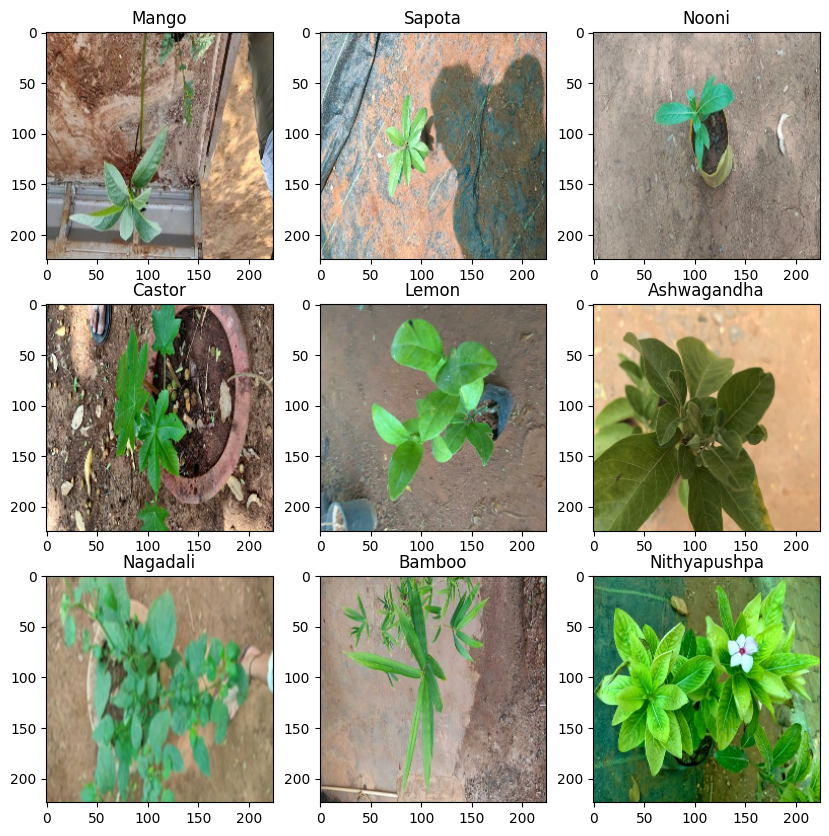

In [ ]:
plt.figure(figsize = (10,10))
for images,labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [ ]:
# Initialize an empty list to store images
images_list = []

# Initialize an empty NumPy array for labels
labels_array = np.array([])

# Iterate through the dataset
for image_batch, label_batch in ds_train:
    # Append the image batch to the images list
    images_list.append(image_batch.numpy())

    # Concatenate the label batch to the existing labels_array
    labels_array = np.concatenate([labels_array, label_batch.numpy()], axis=0)

# Concatenate the list of image batches into a NumPy array
images_array = np.concatenate(images_list, axis=0)

# Now, 'images_array' contains all the images in a 4D NumPy array, and 'labels_array' contains all the labels as a NumPy array


In [ ]:
images_array.shape

(3567, 224, 224, 3)

In [ ]:
labels_array

array([18., 25., 25., ..., 20.,  1.,  2.])

In [ ]:
images_array[0]

array([[[184.7496 , 180.7496 , 177.7496 ],
        [195.97075, 191.97075, 188.97075],
        [199.6789 , 194.6789 , 190.6789 ],
        ...,
        [166.30316, 156.30316, 146.30316],
        [172.80484, 162.80484, 152.80484],
        [169.85579, 159.85579, 149.85579]],

       [[190.51427, 186.20624, 182.89821],
        [196.19077, 191.88274, 188.57469],
        [189.06744, 184.06744, 180.06744],
        ...,
        [167.57985, 157.57985, 147.8879 ],
        [170.82776, 160.82776, 151.13579],
        [170.25853, 160.25853, 150.25853]],

       [[194.62302, 189.62302, 185.62302],
        [194.40865, 189.40865, 185.40865],
        [181.74083, 176.74083, 172.74083],
        ...,
        [168.41255, 158.41255, 149.41255],
        [169.27028, 159.27028, 150.27028],
        [172.21446, 162.21446, 152.21446]],

       ...,

       [[208.2597 , 203.2597 , 199.2597 ],
        [219.00333, 211.00333, 208.00333],
        [214.03223, 206.03223, 203.03223],
        ...,
        [176.33624, 177.51

(-0.5, 223.5, 223.5, -0.5)

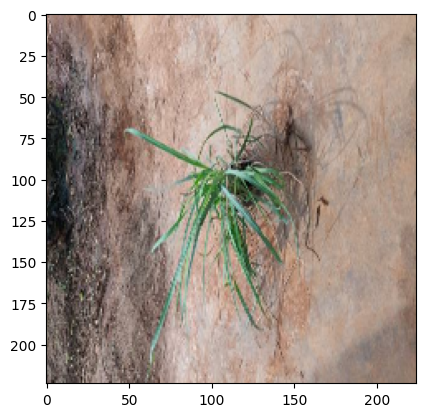

In [ ]:
plt.imshow(images_array[2].astype("uint8"))
plt.axis("on")

In [ ]:
class_names[int(labels_array[2])]

'Lemon_grass'

Training the model

In [ ]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SIZE = [224,224]


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE +[3] , weights = 'imagenet' , include_top = False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(class_names) , activation = "softmax")(x)

In [ ]:
model = Model(inputs = vgg.input,outputs = prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │     1,003,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,718,248 (59.96 MB)

 Trainable params: 1,003,560 (3.83 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer ='adam',
    metrics = ['accuracy']
)

In [ ]:
labels_array

array([18., 25., 25., ..., 20.,  1.,  2.])

In [ ]:
# One-hot encode the labels
labels_one_hot = tf.keras.utils.to_categorical(labels_array, num_classes=40)

In [ ]:
r = model.fit(
    images_array,
    labels_one_hot,
    batch_size=16,
    epochs = 5
)

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 973s 4s/step - accuracy: 0.4400 - loss: 19.5057
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 1035s 5s/step - accuracy: 0.9143 - loss: 2.8841
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 593s 3s/step - accuracy: 0.9565 - loss: 1.3523
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.9685 - loss: 1.1977
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.9800 - loss: 0.9391


In [ ]:
# Save the entire model, including architecture, weights, and optimizer state
model.save("my_model.h5")  # Provide a filename with a '.h5' extension

**Testing model;**

In [ ]:
import matplotlib.pyplot as plt

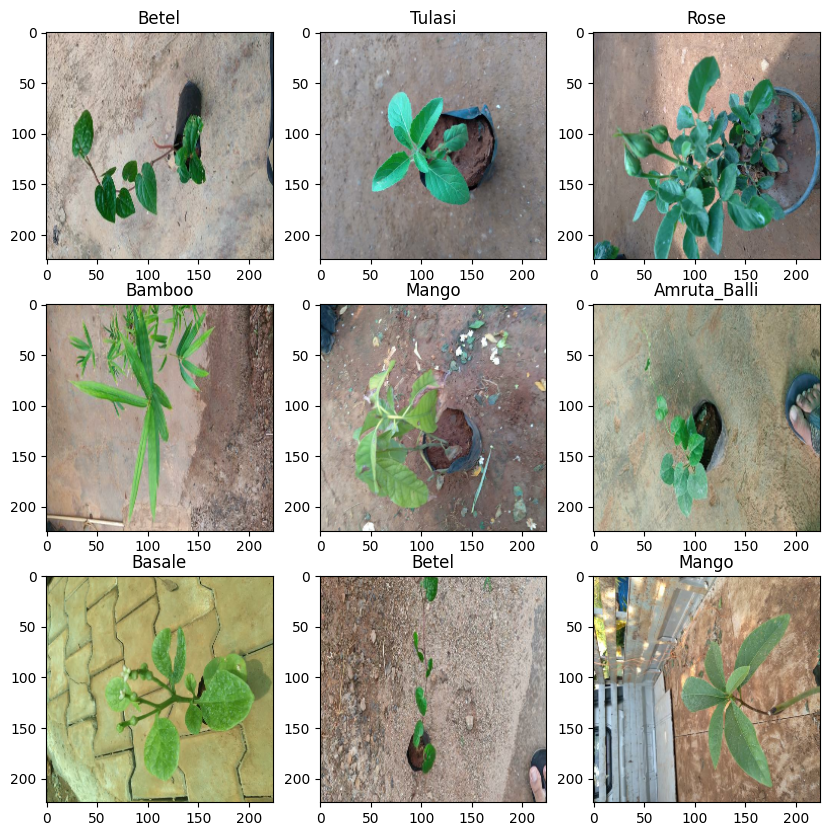

In [ ]:
plt.figure(figsize = (10,10))
for images,labels in ds_val.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [ ]:
import numpy as np

In [ ]:
# Initialize empty lists to store images and labels
images_list_v = []
labels_list_v = []

# Iterate through the dataset
for image_batch, label_batch in ds_val:
    # Append the image batch to the images list
    images_list_v.append(image_batch.numpy())

    # Append the label batch to the labels list
    labels_list_v.append(label_batch.numpy())

# Concatenate the list of image batches into a NumPy array
images_array_v = np.concatenate(images_list_v, axis=0)

# Concatenate the list of label batches into a NumPy array
labels_array_v = np.concatenate(labels_list_v, axis=0)

# Now, 'images_array' contains all the images in a 4D NumPy array, and 'labels_array' contains all the corresponding labels as a NumPy array


In [ ]:
images_array_v.shape

(3567, 224, 224, 3)

In [ ]:
labels_array_v.shape

(3567,)

In [ ]:
# One-hot encode the labels
labels_one_hot_v = tf.keras.utils.to_categorical(labels_array_v, num_classes=40)

In [ ]:
model_new = tf.keras.models.load_model("my_model.h5")

In [ ]:
model_new.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │     1,003,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,718,250 (59.96 MB)

 Trainable params: 1,003,560 (3.83 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_new.evaluate(images_array_v,labels_one_hot_v)

112/112 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.9888 - loss: 0.7650


[0.45777466893196106, 0.9873843789100647]

In [ ]:
y_pred = model_new.predict(images_array_v)

112/112 ━━━━━━━━━━━━━━━━━━━━ 454s 4s/step


In [ ]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(labels_array_v, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        97
           2       0.94      1.00      0.97        94
           3       1.00      0.99      0.99        91
           4       1.00      1.00      1.00        89
           5       0.98      1.00      0.99        86
           6       0.94      1.00      0.97        81
           7       1.00      1.00      1.00        96
           8       1.00      0.98      0.99        87
           9       0.97      0.99      0.98        91
          10       1.00      0.99      0.99        96
          11       1.00      0.99      0.99        83
          12       0.96      1.00      0.98        98
          13       1.00      1.00      1.00        70
          14       0.99      1.00      0.99        90
          15       0.98      1.00      0.99       103
          16       0.98      0.91      0.95        69
  

<Axes: >

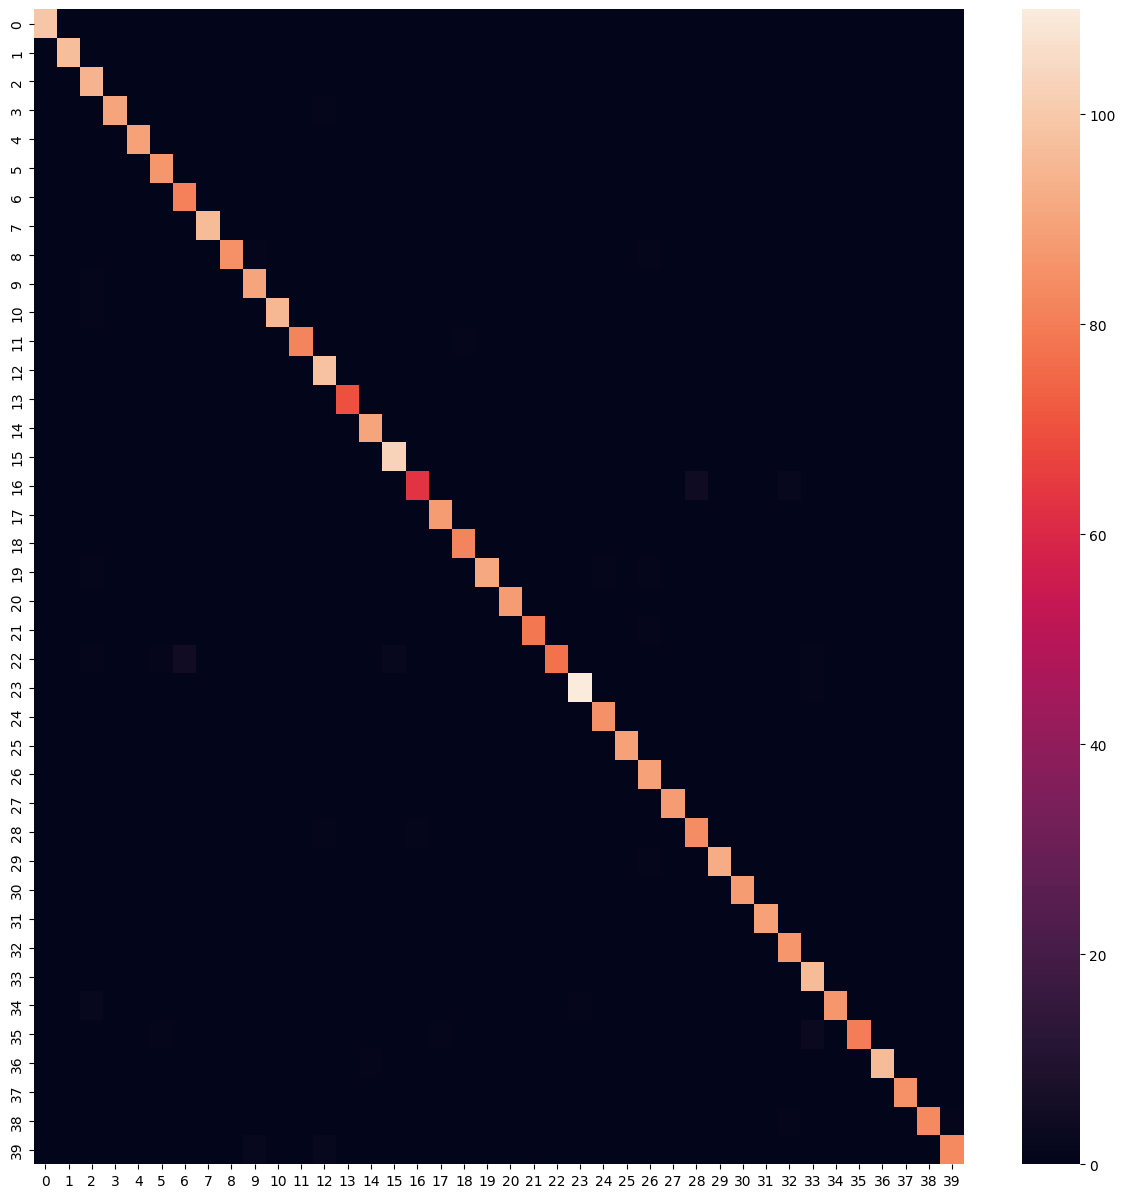

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(labels_array_v, y_pred_classes))

In [ ]:
!ls

my_app.py		      plant_prediction.ipynb  README.md
my_model.h5		      plant-prediction.pdf    requirements.txt
plant_prediction_heatmap.png  plants.json	      Web-App
